<a href="https://colab.research.google.com/github/SongChaeRin7987/OUTTA/blob/main/%EC%86%A1%EC%B1%84%EB%A6%B0_(%EA%B3%BC%EC%A0%9C_%EB%AC%B8%EC%A0%9C)%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%ED%98%84%EB%8C%80%EC%A4%91%EA%B3%A0%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도학습 과제
### 전처리 2차시에서 진행한 실습에서 이어지는 내용입니다.
### 2차시에서 최종적으로 저장한 hyundi_preprocessed.csv 파일을 활용해 비지도학습 클러스터링을 진행합니다.

### 파일 불러오기

In [43]:
import numpy as np
import pandas as pd

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
df = pd.read_csv('/content/gdrive/MyDrive/OUTTA/hyundi_preprocessed.csv', index_col=0)

In [46]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,7,2017,7999,0,17307,0,145.0,58.9,1.2
1,12,2016,14499,2,25233,2,235.0,43.5,2.0
2,12,2016,11399,0,37877,2,30.0,61.7,1.7
3,5,2016,6499,0,23789,0,20.0,60.1,1.0
4,6,2015,10199,0,33177,2,160.0,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4854,15,2019,29995,3,1567,2,145.0,39.8,2.2
4856,9,2015,7830,0,59508,2,30.0,65.7,1.7
4857,5,2017,6830,0,13810,0,20.0,60.1,1.0
4858,12,2018,13994,0,23313,0,145.0,44.8,1.6


# 지금부터 df를 활용해 K-means Clustering을 진행하시면 됩니다.
* 다양한 클러스터를 만들며, 클러스터링에 익숙해지는 자유도 높은 과제 입니다.
* 비지도학습 K-means Clustering 강의 및 자료를 활용해 현대 중고차에 대한 클러스터링 분석을 자유롭게 진행해보세요.
* 분석을 위해 모든 열을 다 사용해도 되고, 몇 가지 열을 골라서 진행해도 됩니다!

In [47]:
# 분석을 진행할 열 3개를 가져옵니다.
df_new = df[['price','year','mileage']]

df_new

,price,year,mileage
0,7999,2017,17307
1,14499,2016,25233
2,11399,2016,37877
3,6499,2016,23789
4,10199,2015,33177
...,...,...,...
4854,29995,2019,1567
4856,7830,2015,59508
4857,6830,2017,13810
4858,13994,2018,23313


In [48]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 모델 생성
km = KMeans(n_clusters=3,
            init = "random",
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state=0)

# 클러스터링 수행
y_km = km.fit_predict(df_new)

# 클러스터링 결과 출력
df_new['cluster_label'] = y_km
print(df_new)

      price  year  mileage  cluster_label
0      7999  2017    17307              1
1     14499  2016    25233              0
2     11399  2016    37877              0
3      6499  2016    23789              0
4     10199  2015    33177              0
...     ...   ...      ...            ...
4854  29995  2019     1567              1
4856   7830  2015    59508              2
4857   6830  2017    13810              1
4858  13994  2018    23313              0
4859  15999  2016    11472              1

[4592 rows x 4 columns]


<ipython-input-48-2252d0b15064>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cluster_label'] = y_km


In [49]:
# 클러스터 중심점 확인
centers = km.cluster_centers_[:,:]

centers

array([[10729.16575923,  2016.40653358, 29905.9092559 ],
       [14975.66877221,  2018.12791157,  9088.58823529],
       [ 8117.26600985,  2014.00492611, 60669.93103448]])

In [50]:
df_new

,price,year,mileage,cluster_label
0,7999,2017,17307,1
1,14499,2016,25233,0
2,11399,2016,37877,0
3,6499,2016,23789,0
4,10199,2015,33177,0
...,...,...,...,...
4854,29995,2019,1567,1
4856,7830,2015,59508,2
4857,6830,2017,13810,1
4858,13994,2018,23313,0


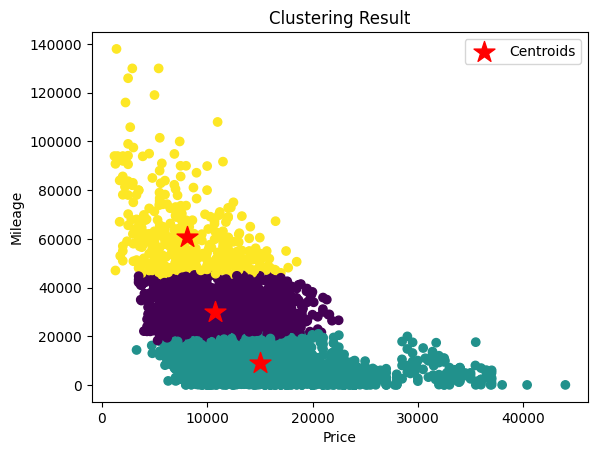

In [51]:
# 클러스터링 결과 시각화
import matplotlib.pyplot as plt

# 4800여개의 데이터를 점 찍는 작업입니다.
plt.scatter(x = df_new["price"]   , y = df_new["mileage"], c=y_km, cmap='viridis')  # x, y, c에 값을 집어넣어주세요

# 각 cluster의 중심을 점 찍는 작업입니다.
plt.scatter(x=km.cluster_centers_[ : , 0], y=km.cluster_centers_[ : , 2], marker='*', s=250, color='red', label='Centroids')

plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Clustering Result')
plt.legend()
plt.show()

# 아래부터는 배운 내용을 바탕으로 다양한 cluster 분석을 진행해주세요.

In [61]:
df_hi = df_new.head(10)

In [62]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

row_clusters = linkage(pdist(df_hi, metric = 'euclidean'),
                       method = 'complete')

pd.DataFrame(row_clusters,
             columns = ['row label 1',
                        'row label 2',
                        'distance',
                        'no. of items in clust.'],
             index = ['cluster %d' %(i +1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,2.0,8.0,1020.798217,2.0
cluster 2,5.0,6.0,2201.160830,2.0
cluster 3,1.0,9.0,4822.536366,2.0
cluster 4,4.0,10.0,4909.076695,3.0
cluster 5,0.0,3.0,6653.294372,2.0
cluster 6,7.0,13.0,8660.226787,4.0
cluster 7,12.0,14.0,10250.437942,4.0
cluster 8,11.0,15.0,13914.920086,6.0
cluster 9,16.0,17.0,24413.196309,10.0


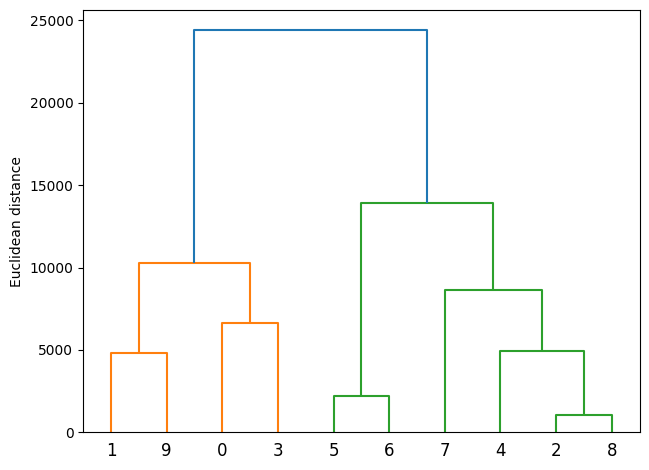

In [63]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendr = dendrogram(row_clusters,
                       labels = df_hi.index
                       )

plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()